<a href="https://colab.research.google.com/github/umak1106/Sumoylation/blob/main/PROT_BERT%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  -r requirements.txt

  Cloning https://github.com/facebookresearch/esm.git to /tmp/pip-req-build-z747urw5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/esm.git /tmp/pip-req-build-z747urw5
  Resolved https://github.com/facebookresearch/esm.git to commit 2b369911bb5b4b0dda914521b9475cad1656b2ac
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 112.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91

In [1]:
!pip install transformers

In [2]:
!pip install tape_proteins

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 13.4 MB/s eta 0:00:00


In [4]:
!pip install pandas
import pandas as pd
train_df = pd.read_csv("data.csv", header=0)
train_df_bert = train_df
train_sentences = train_df_bert.Sequence.values
train_labels = train_df_bert.Label.values

In [8]:
!pip install numpy

In [11]:
!pip install tensorflow
!pip install pytorch_lightning
!pip install SentencePiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00


In [ ]:
X_train = X_ds
X_valid = X_ds


In [35]:
import torch
import pandas as pd
import numpy as np
from tape import ProteinBertModel, TAPETokenizer
from sklearn.model_selection import train_test_split
from transformers import BertForMaskedLM, BertTokenizer, pipeline

# Load your CSV file
file_path = 'data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Assuming 'Sequence' is the column containing protein sequences, and 'Label' is the target column
X = df['Sequence']
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and tokenizer


tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", vocab='iupac')
model = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")
w = 32  # Adjust the window size as needed
X_train_ds = []

# Embedding process for training data
for i in range(X_train.shape[0]):
    # Tokenize the protein sequence
    token_id = torch.tensor([tokenizer.encode(X_train.iloc[i])])

    # Get word embeddings from the model
    output = model(token_id)[0]
    word_embeddings = output[0][1:2 * w + 2].detach().numpy()

    # Append the word embeddings to the list
    X_train_ds.append(word_embeddings)

# Stack and reorganize the data
X_train_ds = np.dstack(X_train_ds)
X_train_ds = np.rollaxis(X_train_ds, -1)

# Display the resulting word embeddings for training data
print(X_train_ds)



tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[[-16.46636  -17.829132 -18.74469  ... -20.025562 -17.88525  -17.73677 ]
  [-17.537766 -18.454987 -18.835583 ... -20.894222 -19.309517 -17.5357  ]]

 [[-16.46636  -17.829132 -18.74469  ... -20.025562 -17.88525  -17.73677 ]
  [-17.537766 -18.454987 -18.835583 ... -20.894222 -19.309517 -17.5357  ]]

 [[-16.46636  -17.829132 -18.74469  ... -20.025562 -17.88525  -17.73677 ]
  [-17.537766 -18.454987 -18.835583 ... -20.894222 -19.309517 -17.5357  ]]

 ...

 [[-16.46636  -17.829132 -18.74469  ... -20.025562 -17.88525  -17.73677 ]
  [-17.537766 -18.454987 -18.835583 ... -20.894222 -19.309517 -17.5357  ]]

 [[-16.46636  -17.829132 -18.74469  ... -20.025562 -17.88525  -17.73677 ]
  [-17.537766 -18.454987 -18.835583 ... -20.894222 -19.309517 -17.5357  ]]

 [[-16.46636  -17.829132 -18.74469  ... -20.025562 -17.88525  -17.73677 ]
  [-17.537766 -18.454987 -18.835583 ... -20.894222 -19.309517 -17.5357  ]]]


In [37]:
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import os
import logging
from configparser import ConfigParser

logger = logging.getLogger(__name__)

def CNNModel(X_train, Y_train, X_valid, Y_valid, embedding_input_shape, config_file='CNN_config.ini'):
    # Load configuration from the specified INI file
    parser = ConfigParser(os.environ)
    if not os.path.exists(config_file):
        raise IOError("Configuration file '%s' does not exist" % config_file)
    logging.info('Loading config from %s', config_file)
    parser.read(config_file)
    config_header = 'CNN'

    logger.info('config header: %s', config_header)

    # Retrieve hyperparameters from the configuration file
    filters = parser.getint(config_header, 'filters')
    kernels = parser.getint(config_header, 'kernels')
    dense_layers1 = parser.getint(config_header, 'dense_layers1')
    dense_layers2 = parser.getint(config_header, 'dense_layers2')
    Learning_Rate = parser.getfloat(config_header, 'Learning_Rate')
    dropout = parser.getfloat(config_header, 'dropout')
    Batch_size = parser.getint(config_header, 'Batch_size')
    Epochs = parser.getint(config_header, 'Epochs')
    earlystop = parser.getboolean(config_header, 'earlystop')

    # Define the model input shape based on the protein embeddings
    inputs = keras.Input(shape=embedding_input_shape, dtype="float32")

    kmodel = keras.models.Sequential()
    kmodel.add(layers.Reshape(input_shape=embedding_input_shape, target_shape=embedding_input_shape))
    kmodel.add(layers.Conv1D(filters, kernel_size=kernels, padding='same', batch_input_shape=(None, *embedding_input_shape)))
    kmodel.add(layers.BatchNormalization(name="conv_1_bn"))
    kmodel.add(layers.ReLU(name="conv_1_relu"))

    kmodel.add(layers.Flatten())
    kmodel.add(layers.Dense(dense_layers1, activation='relu'))
    kmodel.add(layers.Dense(dense_layers2, kernel_regularizer=keras.regularizers.l2(0.001),
                            activity_regularizer=keras.regularizers.l1(0.001)))
    kmodel.add(layers.Activation('relu'))
    kmodel.add(layers.Dropout(dropout))
    kmodel.add(layers.Dense(1, activation='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=Learning_Rate)
    kmodel.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)
    callback1 = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=8, restore_best_weights=True)
    if earlystop:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid),
                   callbacks=[callback1])
    else:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid))

    return kmodel



# Modify the input shape based on the dimensions of your protein embeddings
model_input_shape = X_train_ds.shape[1:]

# Call your CNNModel function
model = CNNModel(X_train_ds, y_train, X_train_ds, y_train, embedding_input_shape=model_input_shape)
model.save('PROTBertCNN.h5')


Epoch 1/100
94/94 [==============================] - 6s 20ms/step - loss: 0.7461 - accuracy: 0.4968 - val_loss: 0.7310 - val_accuracy: 0.5020
Epoch 2/100
94/94 [==============================] - 1s 16ms/step - loss: 0.7214 - accuracy: 0.4859 - val_loss: 0.7213 - val_accuracy: 0.5020
Epoch 3/100
94/94 [==============================] - 2s 17ms/step - loss: 0.7142 - accuracy: 0.5012 - val_loss: 0.7100 - val_accuracy: 0.4980
Epoch 4/100
94/94 [==============================] - 2s 19ms/step - loss: 0.7084 - accuracy: 0.4945 - val_loss: 0.7068 - val_accuracy: 0.5020
Epoch 5/100
94/94 [==============================] - 1s 11ms/step - loss: 0.7058 - accuracy: 0.5064 - val_loss: 0.7048 - val_accuracy: 0.5020
Epoch 6/100
94/94 [==============================] - 2s 16ms/step - loss: 0.7041 - accuracy: 0.4878 - val_loss: 0.7031 - val_accuracy: 0.5020
Epoch 7/100
94/94 [==============================] - 1s 15ms/step - loss: 0.7025 - accuracy: 0.4950 - val_loss: 0.7017 - val_accuracy: 0.5020
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Assuming you already have the trained model 'model' and test data 'X_test_ds'
# Initialize the model and tokenizer

tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", vocab='iupac')
model = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")
w = 32  # Adjust the window size as needed

# Tokenize and embed the test data
X_test_ds = []
for i in range(X_test.shape[0]):
    token_id = torch.tensor([tokenizer.encode(X_test.iloc[i])])
    output = model(token_id)[0]
    word_embeddings = output[0][1:2 * w + 2].detach().numpy()
    X_test_ds.append(word_embeddings)

# Stack and reorganize the data
X_test_ds = np.dstack(X_test_ds)
X_test_ds = np.rollaxis(X_test_ds, -1)




Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
from keras.models import load_model
model = load_model('PROTBertCNN.h5')
# Predict on the test data
y_pred = model.predict(X_test_ds)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_binary)

# Print the results
print(f'AUC: {auc}')
print(f'Accuracy: {acc}')

47/47 [==============================] - 0s 4ms/step
AUC: 0.5
Accuracy: 0.49195710455764075


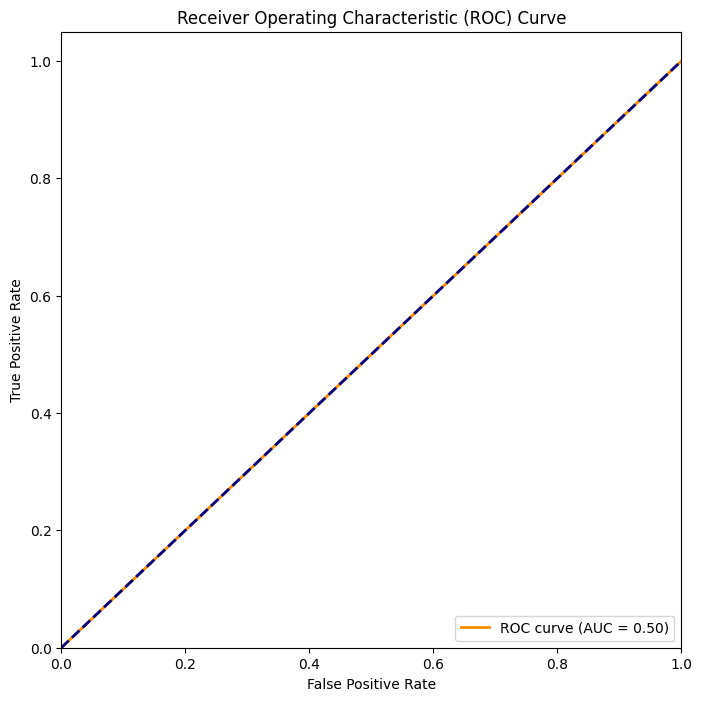

AUC: 0.5
Accuracy: 0.49195710455764075


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you already have the true labels 'y_test' and predicted probabilities 'y_pred'
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC and accuracy values
print(f'AUC: {roc_auc}')
print(f'Accuracy: {acc}')
